In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [3]:
df = pd.read_csv("ECG Heartbeat/mitbih_train.csv", header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

<AxesSubplot: xlabel='187', ylabel='count'>

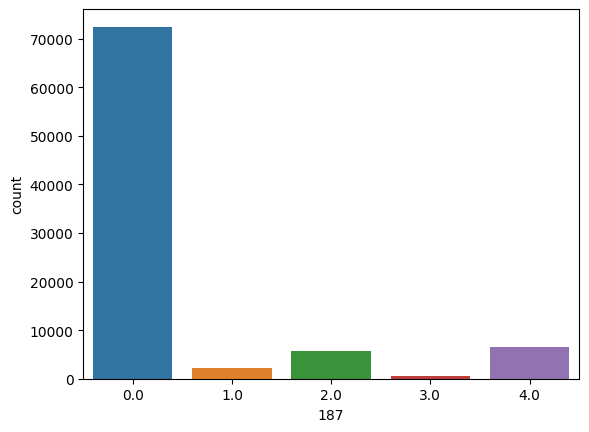

In [6]:
classes = []
sns.countplot(x=187, data = df) 

In [13]:
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight, resample

class_1 = df[df[187]==1.0]
class_2 = df[df[187]==2.0]
class_3 = df[df[187]==3.0]
class_4 = df[df[187]==4.0]
class_0 = df[df[187]==0.0].sample(n = 8000)

class_1=resample(class_1, replace=True, n_samples=8000, random_state=1)
class_2=resample(class_2, replace=True, n_samples=8000, random_state=1)
class_3=resample(class_3, replace=True, n_samples=8000, random_state=1)
class_4=resample(class_4, replace=True, n_samples=8000, random_state=1)

In [14]:
new_df = pd.concat([class_0, class_1, class_2, class_3, class_4])

In [15]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
648,0.983425,0.832413,0.296501,0.000000,0.151013,0.244936,0.261510,0.298343,0.303867,0.298343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18696,1.000000,0.891683,0.673114,0.479691,0.218569,0.058027,0.003868,0.003868,0.013540,0.050290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20204,0.991071,0.732143,0.446429,0.229167,0.113095,0.056548,0.020833,0.000000,0.008929,0.002976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9491,1.000000,0.786730,0.364929,0.000000,0.014218,0.056872,0.071090,0.109005,0.142180,0.137441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54931,0.964567,0.927822,0.444882,0.000000,0.179790,0.217848,0.153543,0.152231,0.149606,0.145669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


<AxesSubplot: xlabel='187', ylabel='count'>

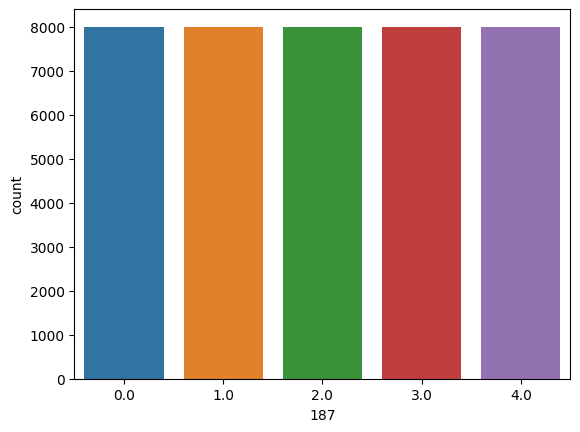

In [17]:
sns.countplot(x=187, data = new_df) 

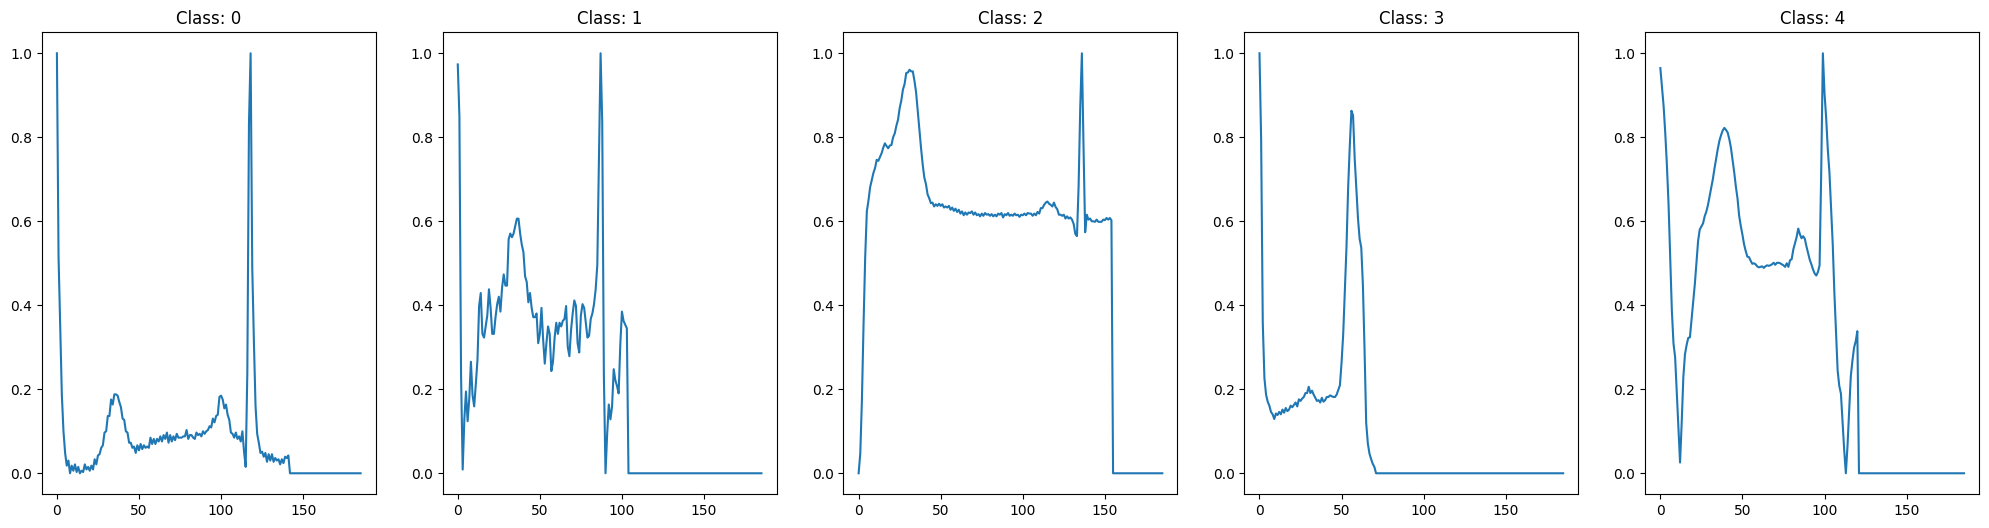

In [18]:
index = 0

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,6))

for i in range(5):
  ax[i].plot(new_df[new_df[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.drop([187], axis=1), new_df[187], test_size = 0.1)

In [20]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
from keras.utils.np_utils import to_categorical

y_train=keras.utils.np_utils.to_categorical(y_train)
y_test=keras.utils.np_utils.to_categorical(y_test)

In [26]:
from tensorflow.keras import Sequential,utils
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout , Conv2D

In [44]:
'''cnn = Sequential()
cnn.add(Conv1D(128,3,input_shape=(X_train.shape[1],1), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,2, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,2, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(5, activation='softmax'))'''

cnn = Sequential()

cnn.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
cnn.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
cnn.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

cnn.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn.add(Dropout(0.5))

cnn.add(Flatten())

cnn.add(Dense(units = 512, activation='relu'))
cnn.add(Dense(units = 1024, activation='relu'))

cnn.add(Dense(units = 5, activation='softmax'))

In [45]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 187, 32)           128       
                                                                 
 conv1d_7 (Conv1D)           (None, 187, 64)           6208      
                                                                 
 conv1d_8 (Conv1D)           (None, 187, 128)          41088     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 94, 128)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 94, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 12032)             0         
                                                      

In [46]:
callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [47]:
history=cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30 , callbacks=callbacks, batch_size=32)
cnn.load_weights('best_model.h5')

Epoch 1/30
1125/1125 [==============================] - 303s 264ms/step - loss: 0.3442 - accuracy: 0.8732 - val_loss: 0.1708 - val_accuracy: 0.9435
Epoch 2/30
1125/1125 [==============================] - 270s 240ms/step - loss: 0.1453 - accuracy: 0.9486 - val_loss: 0.1195 - val_accuracy: 0.9590
Epoch 3/30
1125/1125 [==============================] - 265s 236ms/step - loss: 0.0892 - accuracy: 0.9690 - val_loss: 0.0973 - val_accuracy: 0.9647
Epoch 4/30
1125/1125 [==============================] - 265s 236ms/step - loss: 0.0698 - accuracy: 0.9764 - val_loss: 0.0650 - val_accuracy: 0.9778
Epoch 5/30
1125/1125 [==============================] - 279s 248ms/step - loss: 0.0614 - accuracy: 0.9795 - val_loss: 0.0652 - val_accuracy: 0.9765
Epoch 6/30
1125/1125 [==============================] - 264s 235ms/step - loss: 0.0460 - accuracy: 0.9839 - val_loss: 0.0636 - val_accuracy: 0.9800
Epoch 7/30
1125/1125 [==============================] - 262s 233ms/step - loss: 0.0450 - accuracy: 0.9853 - val_

In [65]:
test_df=pd.read_csv('ECG Heartbeat/mitbih_test.csv',header=None)

<AxesSubplot: xlabel='187', ylabel='count'>

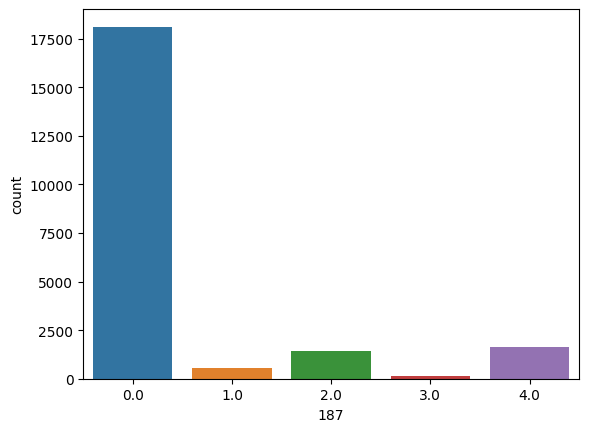

In [66]:
classes = []
sns.countplot(x=187, data = test_df)

In [85]:
print(test_df[187].value_counts())

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [154]:
class_1 = test_df[test_df[187]==1.0]
class_2 = test_df[test_df[187]==2.0]
class_3 = test_df[test_df[187]==3.0]
class_4 = test_df[test_df[187]==4.0]
class_0 = test_df[test_df[187]==0.0].sample(n = 1400)

#class_1=resample(class_1, replace=True, n_samples=1400, random_state=1)
#class_2=resample(class_2, replace=True, n_samples=2000, random_state=1)
class_3=resample(class_3, replace=True, n_samples=800, random_state=1)
#class_4=resample(class_4, replace=True, n_samples=2000, random_state=1)

In [155]:
new_test_df = pd.concat([class_0, class_1, class_2, class_3, class_4])

<AxesSubplot: xlabel='187', ylabel='count'>

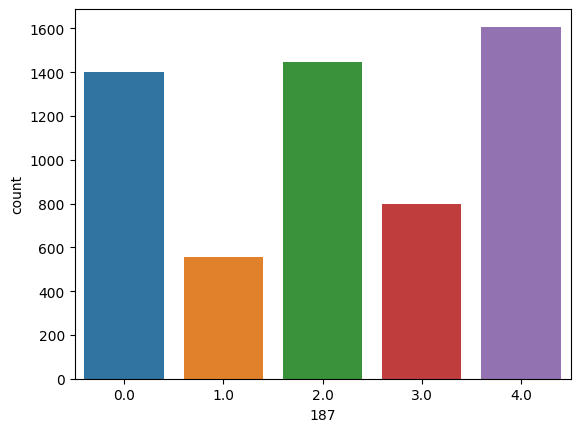

In [156]:
 sns.countplot(x=187, data = new_test_df) 

In [157]:
test_x = new_test_df.drop([187], axis=1)
test_y = new_test_df[187]
test_x = np.array(test_x).reshape(test_x.shape[0], test_x.shape[1], 1)
test_y=keras.utils.np_utils.to_categorical(test_y)

In [158]:
from keras.models import load_model
best_model=load_model('best_model.h5')
results1 = best_model.evaluate(test_x,test_y, verbose=0)

print("     Test Loss: {:.5f}".format(results1[0]))
print(" Test Accuracy: {:.2f}%".format(results1[1] * 100))

     Test Loss: 0.45591
 Test Accuracy: 94.67%


In [159]:
results2 = cnn.evaluate(test_x,test_y, verbose=0)

print("     Test Loss: {:.5f}".format(results2[0]))
print(" Test Accuracy: {:.2f}%".format(results2[1] * 100))

     Test Loss: 0.45591
 Test Accuracy: 94.67%


<AxesSubplot: >

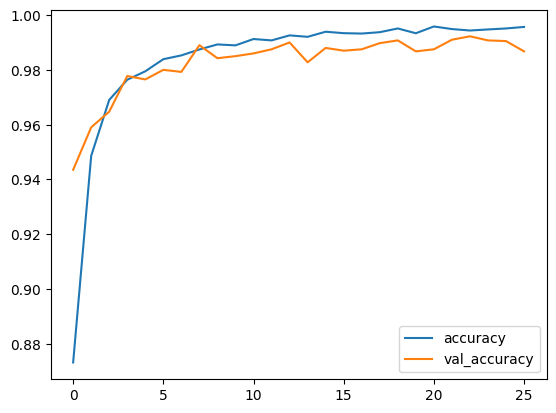

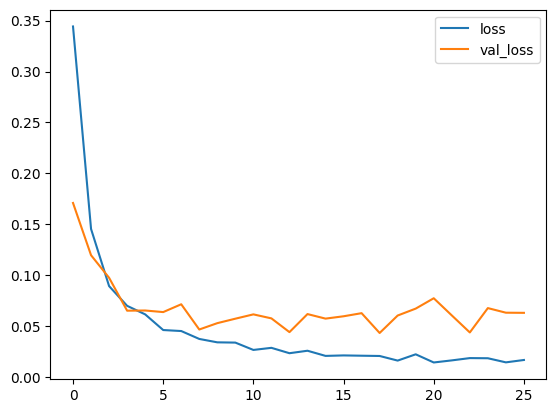

In [115]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

182/182 [==============================] - 4s 21ms/step


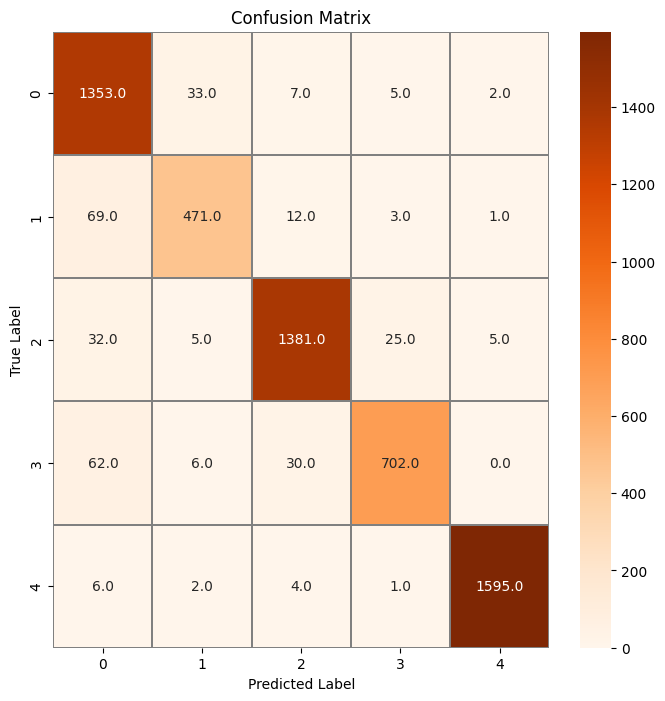

In [160]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Y_pred = cnn.predict(test_x)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_y,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [133]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1400
           1       0.93      0.85      0.88       556
           2       0.96      0.95      0.96      1448
           3       0.94      0.89      0.91       500
           4       0.99      0.99      0.99      1608

    accuracy                           0.95      5512
   macro avg       0.95      0.93      0.94      5512
weighted avg       0.95      0.95      0.95      5512



In [53]:
results3 = cnn.evaluate(X_test,y_test, verbose=0)

print("     Test Loss: {:.5f}".format(results3[0]))
print(" Test Accuracy: {:.2f}%".format(results3[1] * 100))

     Test Loss: 0.04308
 Test Accuracy: 98.98%


125/125 [==============================] - 4s 21ms/step


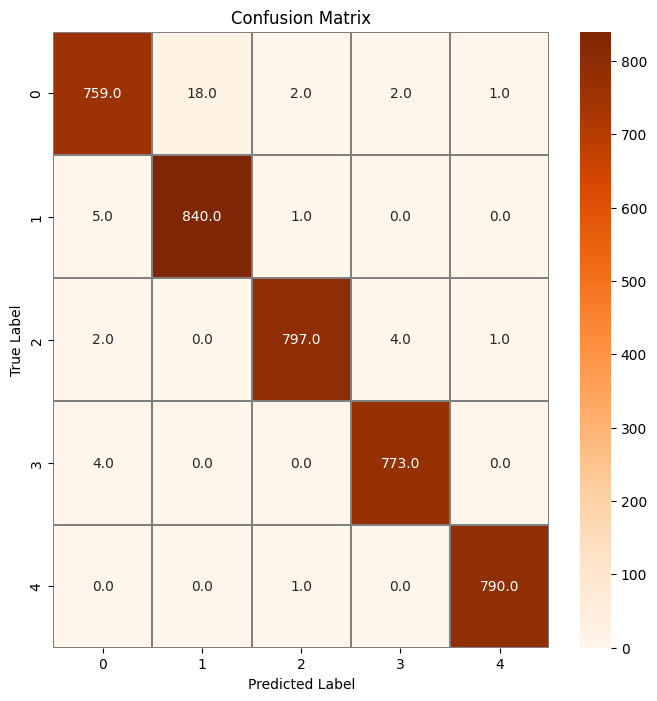

In [54]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Y_pred = cnn.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [186]:
class Classifier_INCEPTION:
    def __init__(self, weights_directory, input_shape, nb_classes, verbose=False, build=True, batch_size=64,
                 nb_filters=32, use_residual=True, use_bottleneck=True, depth=10, kernel_size=41, nb_epochs=20):
        self.weights_directory = weights_directory
        self.nb_filters = nb_filters
        self.use_residual = use_residual
        self.use_bottleneck = use_bottleneck
        self.depth = depth
        self.kernel_size = kernel_size - 1
        self.callbacks = None
        self.batch_size = batch_size
        self.bottleneck_size = 32
        self.nb_epochs = nb_epochs

        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if (verbose == True):
                self.model.summary()
            self.verbose = verbose

    def _inception_module(self, input_tensor, stride=1, activation='linear'):

        if self.use_bottleneck and int(input_tensor.shape[-1]) > 1:
            input_inception = Conv1D(filters=self.bottleneck_size, kernel_size=1,
                                     padding='same', activation=activation, use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_size_s = [self.kernel_size // (2 ** i) for i in range(3)]

        conv_list = []

        for i in range(len(kernel_size_s)):
            conv_list.append(Conv1D(filters=self.nb_filters, kernel_size=kernel_size_s[i],
                                    strides=stride, padding='same', activation=activation, use_bias=False)(
                input_inception))

        max_pool_1 = MaxPool1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        conv_6 = Conv1D(filters=self.nb_filters, kernel_size=1,
                        padding='same', activation=activation, use_bias=False)(max_pool_1)

        conv_list.append(conv_6)

        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        return x

    def _shortcut_layer(self, input_tensor, out_tensor):
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]), kernel_size=1,
                            padding='same', use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        return x

    def build_model(self, input_shape, nb_classes):
        input_layer = Input(input_shape)

        x = input_layer
        input_res = input_layer

        for d in range(self.depth):

            x = self._inception_module(x)

            if self.use_residual and d % 3 == 2:
                x = self._shortcut_layer(input_res, x)
                input_res = x

        gap_layer = GlobalAveragePooling1D()(x)

        output_layer = Dense(nb_classes, activation='softmax')(gap_layer)

        model = Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(),
                      metrics=['accuracy', Precision(), Recall()])

        reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                      factor=0.5, 
                                      patience=int(self.nb_epochs/20),
                                      min_lr=0.0001)
        
        file_path = os.path.join(self.weights_directory,"best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path, 
                                           monitor='val_accuracy',
                                           mode="max",
                                           save_best_only=True)
        
        early_stopping = EarlyStopping(monitor="val_accuracy", 
                                       mode="max", 
                                       verbose=1, 
                                       patience=int(self.nb_epochs/10))
        plotlosses = PlotLossesKeras()
        self.callbacks = [reduce_lr, model_checkpoint, early_stopping, plotlosses]
        return model

    def fit(self, x_train, y_train, x_val, y_val, class_weights=None):       
        if self.batch_size is None:
            mini_batch_size = int(min(x_train.shape[0] / 10, 16))
        else:
            mini_batch_size = self.batch_size

        start_time = time.time()
        hist = self.model.fit(x_train, y_train, 
                              batch_size=mini_batch_size, 
                              epochs=self.nb_epochs,
                              verbose=self.verbose, 
                              validation_data=(x_val, y_val), 
                              callbacks=self.callbacks)
        
        duration = time.time() - start_time
        keras.backend.clear_session()
        print("Model take {} S to train ".format(duration))
        return hist

In [187]:
Classes_index = {
    'N': 0, 
    'S': 1, 
    'V': 2, 
    'F': 3, 
    'Q': 4
}

In [188]:

from keras.layers import Activation,Input,Concatenate, Add, \
                         GlobalAveragePooling1D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot import PlotLossesKeras

weights_directory = "./"
inception = Classifier_INCEPTION(weights_directory, X_train.shape[1:], len(Classes_index.keys()), 1, 
                                 batch_size=256, build=True)



Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 187, 1)]     0           []                               
                                                                                                  
 max_pooling1d_76 (MaxPooling1D  (None, 187, 1)      0           ['input_10[0][0]']               
 )                                                                                                
                                                                                                  
 conv1d_381 (Conv1D)            (None, 187, 32)      1280        ['input_10[0][0]']               
                                                                                                  
 conv1d_382 (Conv1D)            (None, 187, 32)      640         ['input_10[0][0]']         

                                                                                                  
 max_pooling1d_79 (MaxPooling1D  (None, 187, 128)    0           ['activation_94[0][0]']          
 )                                                                                                
                                                                                                  
 conv1d_397 (Conv1D)            (None, 187, 32)      40960       ['conv1d_396[0][0]']             
                                                                                                  
 conv1d_398 (Conv1D)            (None, 187, 32)      20480       ['conv1d_396[0][0]']             
                                                                                                  
 conv1d_399 (Conv1D)            (None, 187, 32)      10240       ['conv1d_396[0][0]']             
                                                                                                  
 conv1d_40

 conv1d_413 (Conv1D)            (None, 187, 32)      40960       ['conv1d_412[0][0]']             
                                                                                                  
 conv1d_414 (Conv1D)            (None, 187, 32)      20480       ['conv1d_412[0][0]']             
                                                                                                  
 conv1d_415 (Conv1D)            (None, 187, 32)      10240       ['conv1d_412[0][0]']             
                                                                                                  
 conv1d_416 (Conv1D)            (None, 187, 32)      4096        ['max_pooling1d_82[0][0]']       
                                                                                                  
 concatenate_77 (Concatenate)   (None, 187, 128)     0           ['conv1d_413[0][0]',             
                                                                  'conv1d_414[0][0]',             
          

 conv1d_431 (Conv1D)            (None, 187, 32)      10240       ['conv1d_428[0][0]']             
                                                                                                  
 conv1d_432 (Conv1D)            (None, 187, 32)      4096        ['max_pooling1d_85[0][0]']       
                                                                                                  
 concatenate_80 (Concatenate)   (None, 187, 128)     0           ['conv1d_429[0][0]',             
                                                                  'conv1d_430[0][0]',             
                                                                  'conv1d_431[0][0]',             
                                                                  'conv1d_432[0][0]']             
                                                                                                  
 batch_normalization_107 (Batch  (None, 187, 128)    512         ['concatenate_80[0][0]']         
 Normaliza

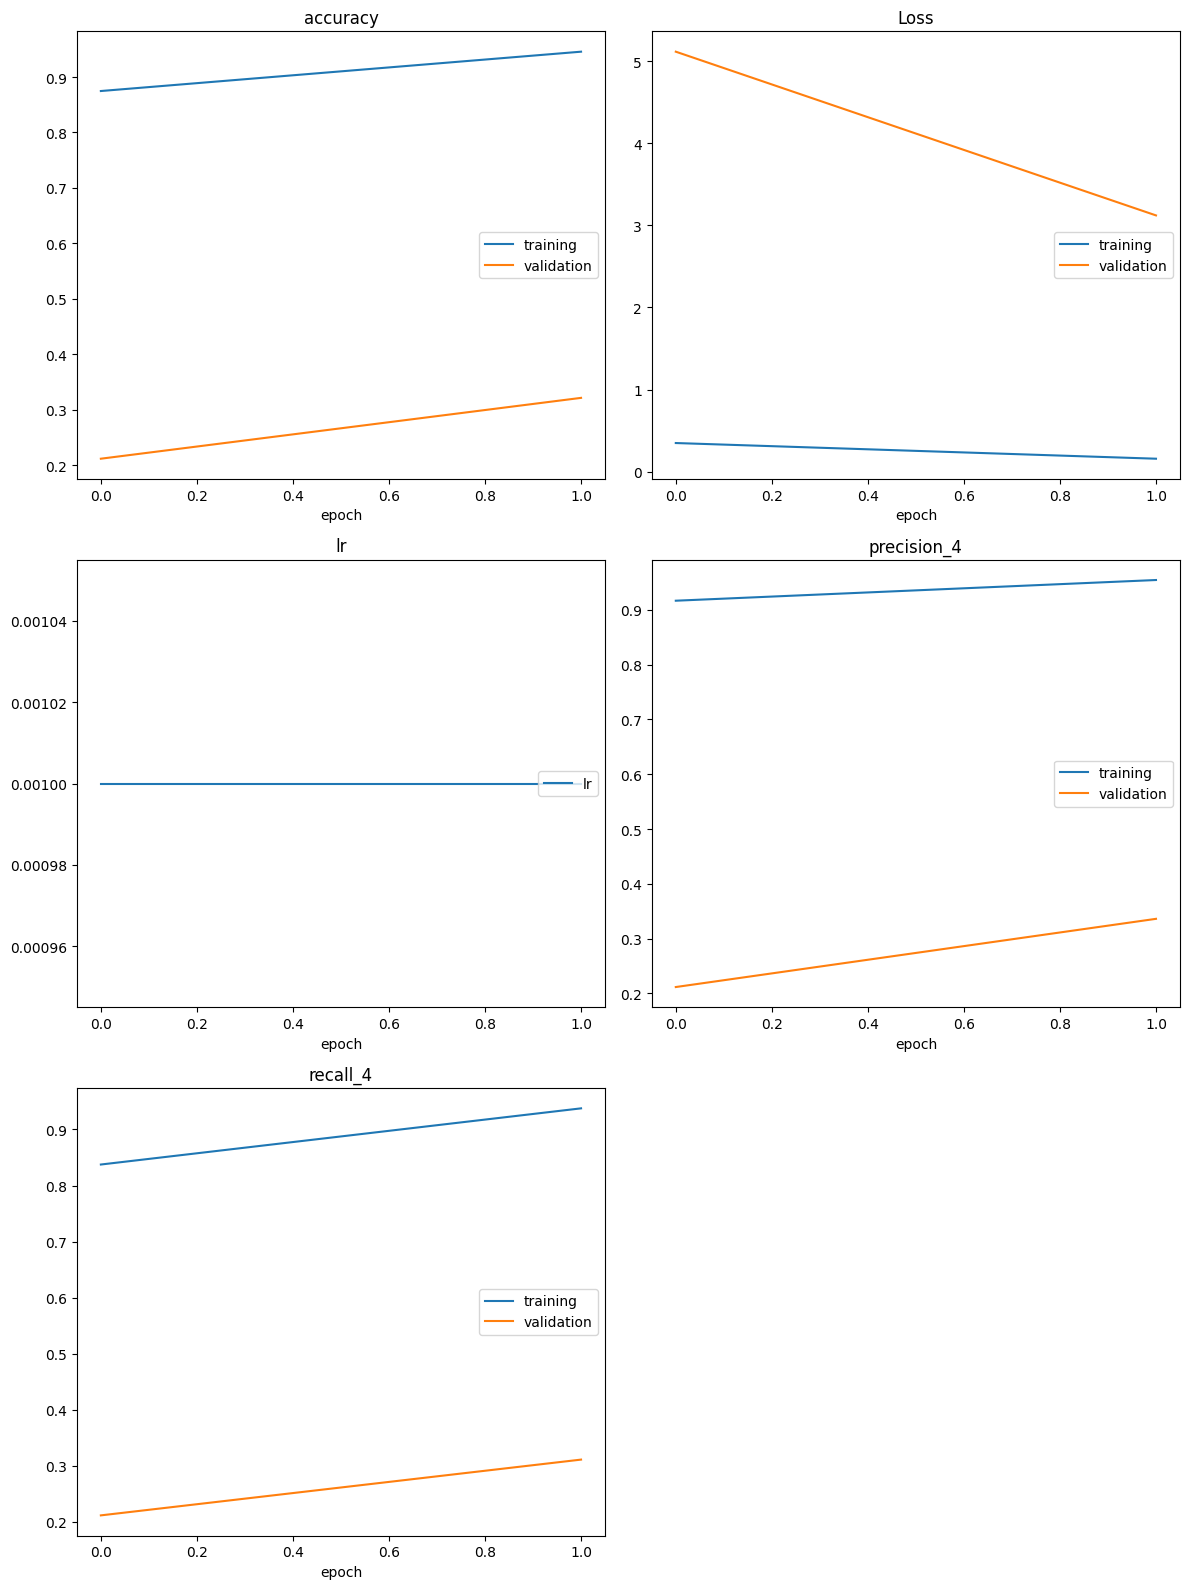

accuracy
	training         	 (min:    0.875, max:    0.946, cur:    0.946)
	validation       	 (min:    0.212, max:    0.321, cur:    0.321)
Loss
	training         	 (min:    0.158, max:    0.349, cur:    0.158)
	validation       	 (min:    3.122, max:    5.117, cur:    3.122)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
precision_4
	training         	 (min:    0.917, max:    0.955, cur:    0.955)
	validation       	 (min:    0.212, max:    0.336, cur:    0.336)
recall_4
	training         	 (min:    0.837, max:    0.938, cur:    0.938)
	validation       	 (min:    0.212, max:    0.311, cur:    0.311)
141/141 [==============================] - 2051s 14s/step - loss: 0.1578 - accuracy: 0.9458 - precision_4: 0.9546 - recall_4: 0.9377 - val_loss: 3.1219 - val_accuracy: 0.3212 - val_precision_4: 0.3360 - val_recall_4: 0.3110 - lr: 0.0010
Epoch 3/20
 41/141 [=======>......................] - ETA: 21:07 - loss: 0.1299 - accuracy: 0.9553 - precision_4: 0.9602 - recall_4


KeyboardInterrupt



In [188]:
import time
history = inception.fit(X_train, y_train, X_test, y_test)

In [ ]:
inception.model.evaluate(test_x, test_y)